# Topic : Analysis of methods of contraceptives used by Women of Reproductive Age


### Problem Statement:

Studies have found that increasing contraceptive use in low and middle income countries (LMICs) can reduce maternal deaths by 44% by preventing unintended pregnancies. But the usage of contraceptive remains a challenge in LMICs either due to access, awareness or local beliefs. We will analyse the 'Family planning data from INDONESIA' to understand the reasons for low usage of contraceptives.

### Dataset Information:

The data set is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. These survey takers are married women who were either not pregnant or did not know about their pregnancy during the interview. Here we have analysed the use of the type of contraceptive methods by the women based on their demographic and socio-economic status.

### Our Audience:

Our project is targeted towards bringing a change in the contraceptive methods used by women to avoid unwanted pregnancies and STDs. The audience can be different NGOs trying to design awareness campaigns or the government so that they can make the required contraceptions available either for free or at a subsidized amount.

### The Attribute information is as given below:


Wife's age (numerical)

Wife's education (categorical) 1=low, 2, 3, 4=high

Husband's education (categorical) 1=low, 2, 3, 4=high

Number of children ever born (numerical)

Wife's religion (binary) 0=Non-Islam, 1=Islam

Wife's now working? (binary) 0=Yes, 1=No

Husband's occupation (categorical) 1, 2, 3, 4

Standard-of-living index (categorical) 1=low, 2, 3, 4=high

Media exposure (binary) 0=Good, 1=Not good

Contraceptive method used (class attribute) 1=No-use ,2=Long-term,3=Short-term

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
import warnings 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [19]:
warnings.filterwarnings('ignore')


In [20]:
df=pd.read_csv('Contraceptive_Methods_Prj_Dataset.csv')

In [21]:

print("Number of Rows in a dataframe = {} ".format(df.shape[0]))
print("Number of Columns in a dataframe = {} ".format(df.shape[1]))

Number of Rows in a dataframe = 1473 
Number of Columns in a dataframe = 10 


In [22]:
df.head()
#Attribute Information:

#Wife's age (numerical)
#Wife's education (categorical) 1=low, 2, 3, 4=high
#Husband's education (categorical) 1=low, 2, 3, 4=high
#Number of children ever born (numerical)
#Wife's religion (binary) 0=Non-Islam, 1=Islam
#Wife's now working? (binary) 0=Yes, 1=No
#Husband's occupation (categorical) 1, 2, 3, 4
#Standard-of-living index (categorical) 1=low, 2, 3, 4=high
#Media exposure (binary) 0=Good, 1=Not good
#Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term


,wife_age,wife_edu,Husband_edu,No_child_born,wife_religion,wife_now_working,husband_occup,living_index,media_exposure,Cont_Methd_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [23]:
df.sample(10)


,wife_age,wife_edu,Husband_edu,No_child_born,wife_religion,wife_now_working,husband_occup,living_index,media_exposure,Cont_Methd_used
812,25,3,3,3,1,1,3,2,0,3
609,45,3,3,6,0,1,2,4,0,2
373,39,3,4,3,1,1,1,4,0,1
342,23,4,4,0,0,1,2,4,0,1
921,45,3,4,2,0,1,3,3,0,3
700,21,4,4,1,1,1,3,1,0,3
1367,44,4,4,5,1,0,1,4,0,3
87,35,4,4,3,0,1,1,4,0,1
1053,35,2,3,8,1,1,3,3,1,1
886,28,3,3,2,0,1,2,3,0,3


In [24]:
df.describe()

,wife_age,wife_edu,Husband_edu,No_child_born,wife_religion,wife_now_working,husband_occup,living_index,media_exposure,Cont_Methd_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [25]:
print("Names of the columns in a dataframe :")
print()

for x in df.columns:
    print(x)

Names of the columns in a dataframe :

wife_age
wife_edu
Husband_edu 
No_child_born
wife_religion
wife_now_working
husband_occup
living_index
media_exposure
Cont_Methd_used


In [26]:
df.values

array([[24,  2,  3, ...,  3,  0,  1],
       [45,  1,  3, ...,  4,  0,  1],
       [43,  2,  3, ...,  4,  0,  1],
       ...,
       [39,  3,  3, ...,  4,  0,  3],
       [33,  3,  3, ...,  2,  0,  3],
       [17,  3,  3, ...,  4,  0,  3]])

## Check the null values

In [27]:
df.isnull() #Detects missing values from the dataset

,wife_age,wife_edu,Husband_edu,No_child_born,wife_religion,wife_now_working,husband_occup,living_index,media_exposure,Cont_Methd_used
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

wife_age            0
wife_edu            0
Husband_edu         0
No_child_born       0
wife_religion       0
wife_now_working    0
husband_occup       0
living_index        0
media_exposure      0
Cont_Methd_used     0
dtype: int64

## Check the Duplicates

In [29]:
df.duplicated() #Finds if any duplicate values are present in the dataset

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1443    False
1444    False
1445     True
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
1460    False
1461    False
1462    False
1463    False
1464    False
1465    False
1466    False
1467    False
1468    False
1469    False
1470    False
1471    False
1472    False
Length: 1473, dtype: bool

In [30]:
df_drop_dup = df.drop_duplicates() #Drops all the redundent values

In [31]:
df_drop_dup.shape #Displays the dimensions of the dataset in terms of rows and columns

(1425, 10)

## Visualization

In [32]:
import seaborn as sns
sns.set(color_codes = True)

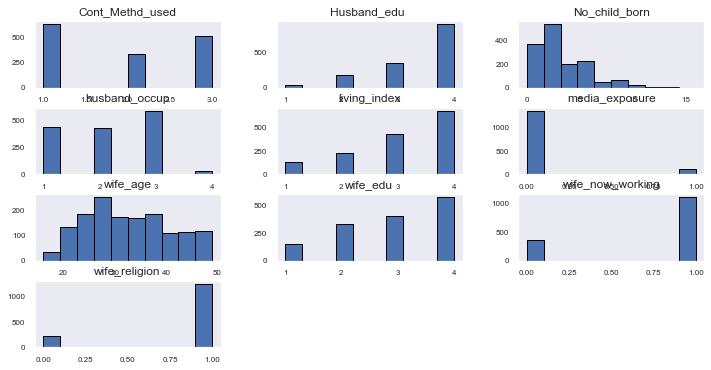

In [33]:
# looking over how different features are distributed in data
df.hist(edgecolor='black',grid=False,xlabelsize=8,ylabelsize=8)
fig=plt.gcf()
fig.set_size_inches(12,6)

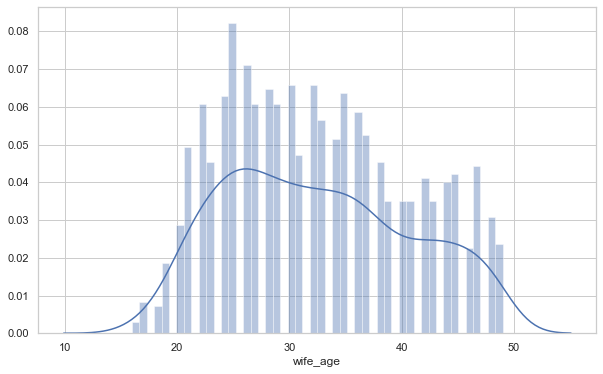

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df['wife_age'],bins=50)

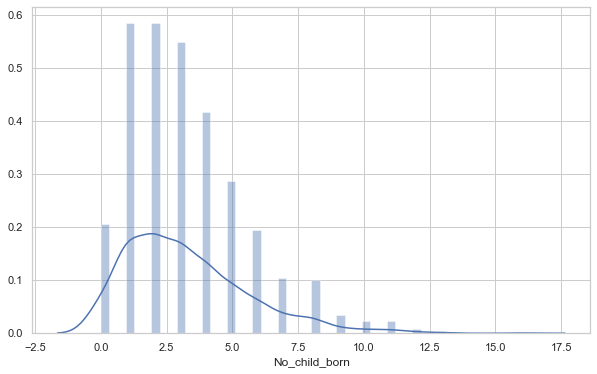

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df['No_child_born'],bins=50)

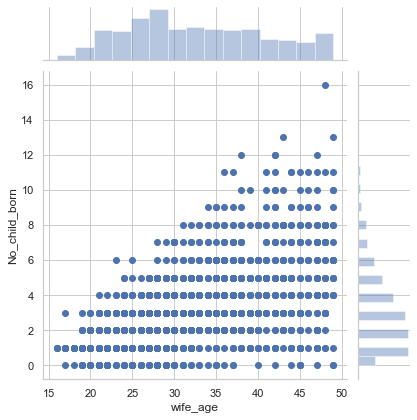

In [36]:
sns.jointplot(x='wife_age',y='No_child_born',data=df)

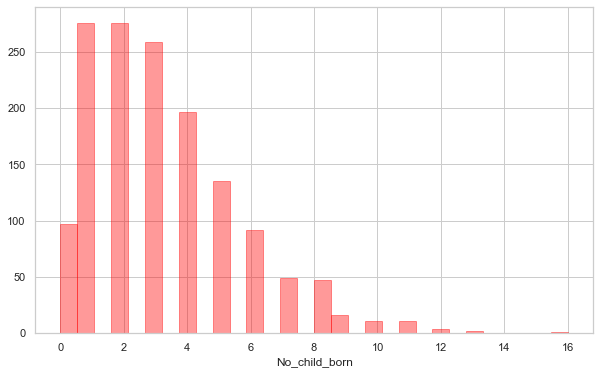

In [37]:
plt.figure(figsize=(10,6))
sns.distplot(df['No_child_born'],bins=30,kde=False,color="red",hist_kws={'edgecolor':'red'})

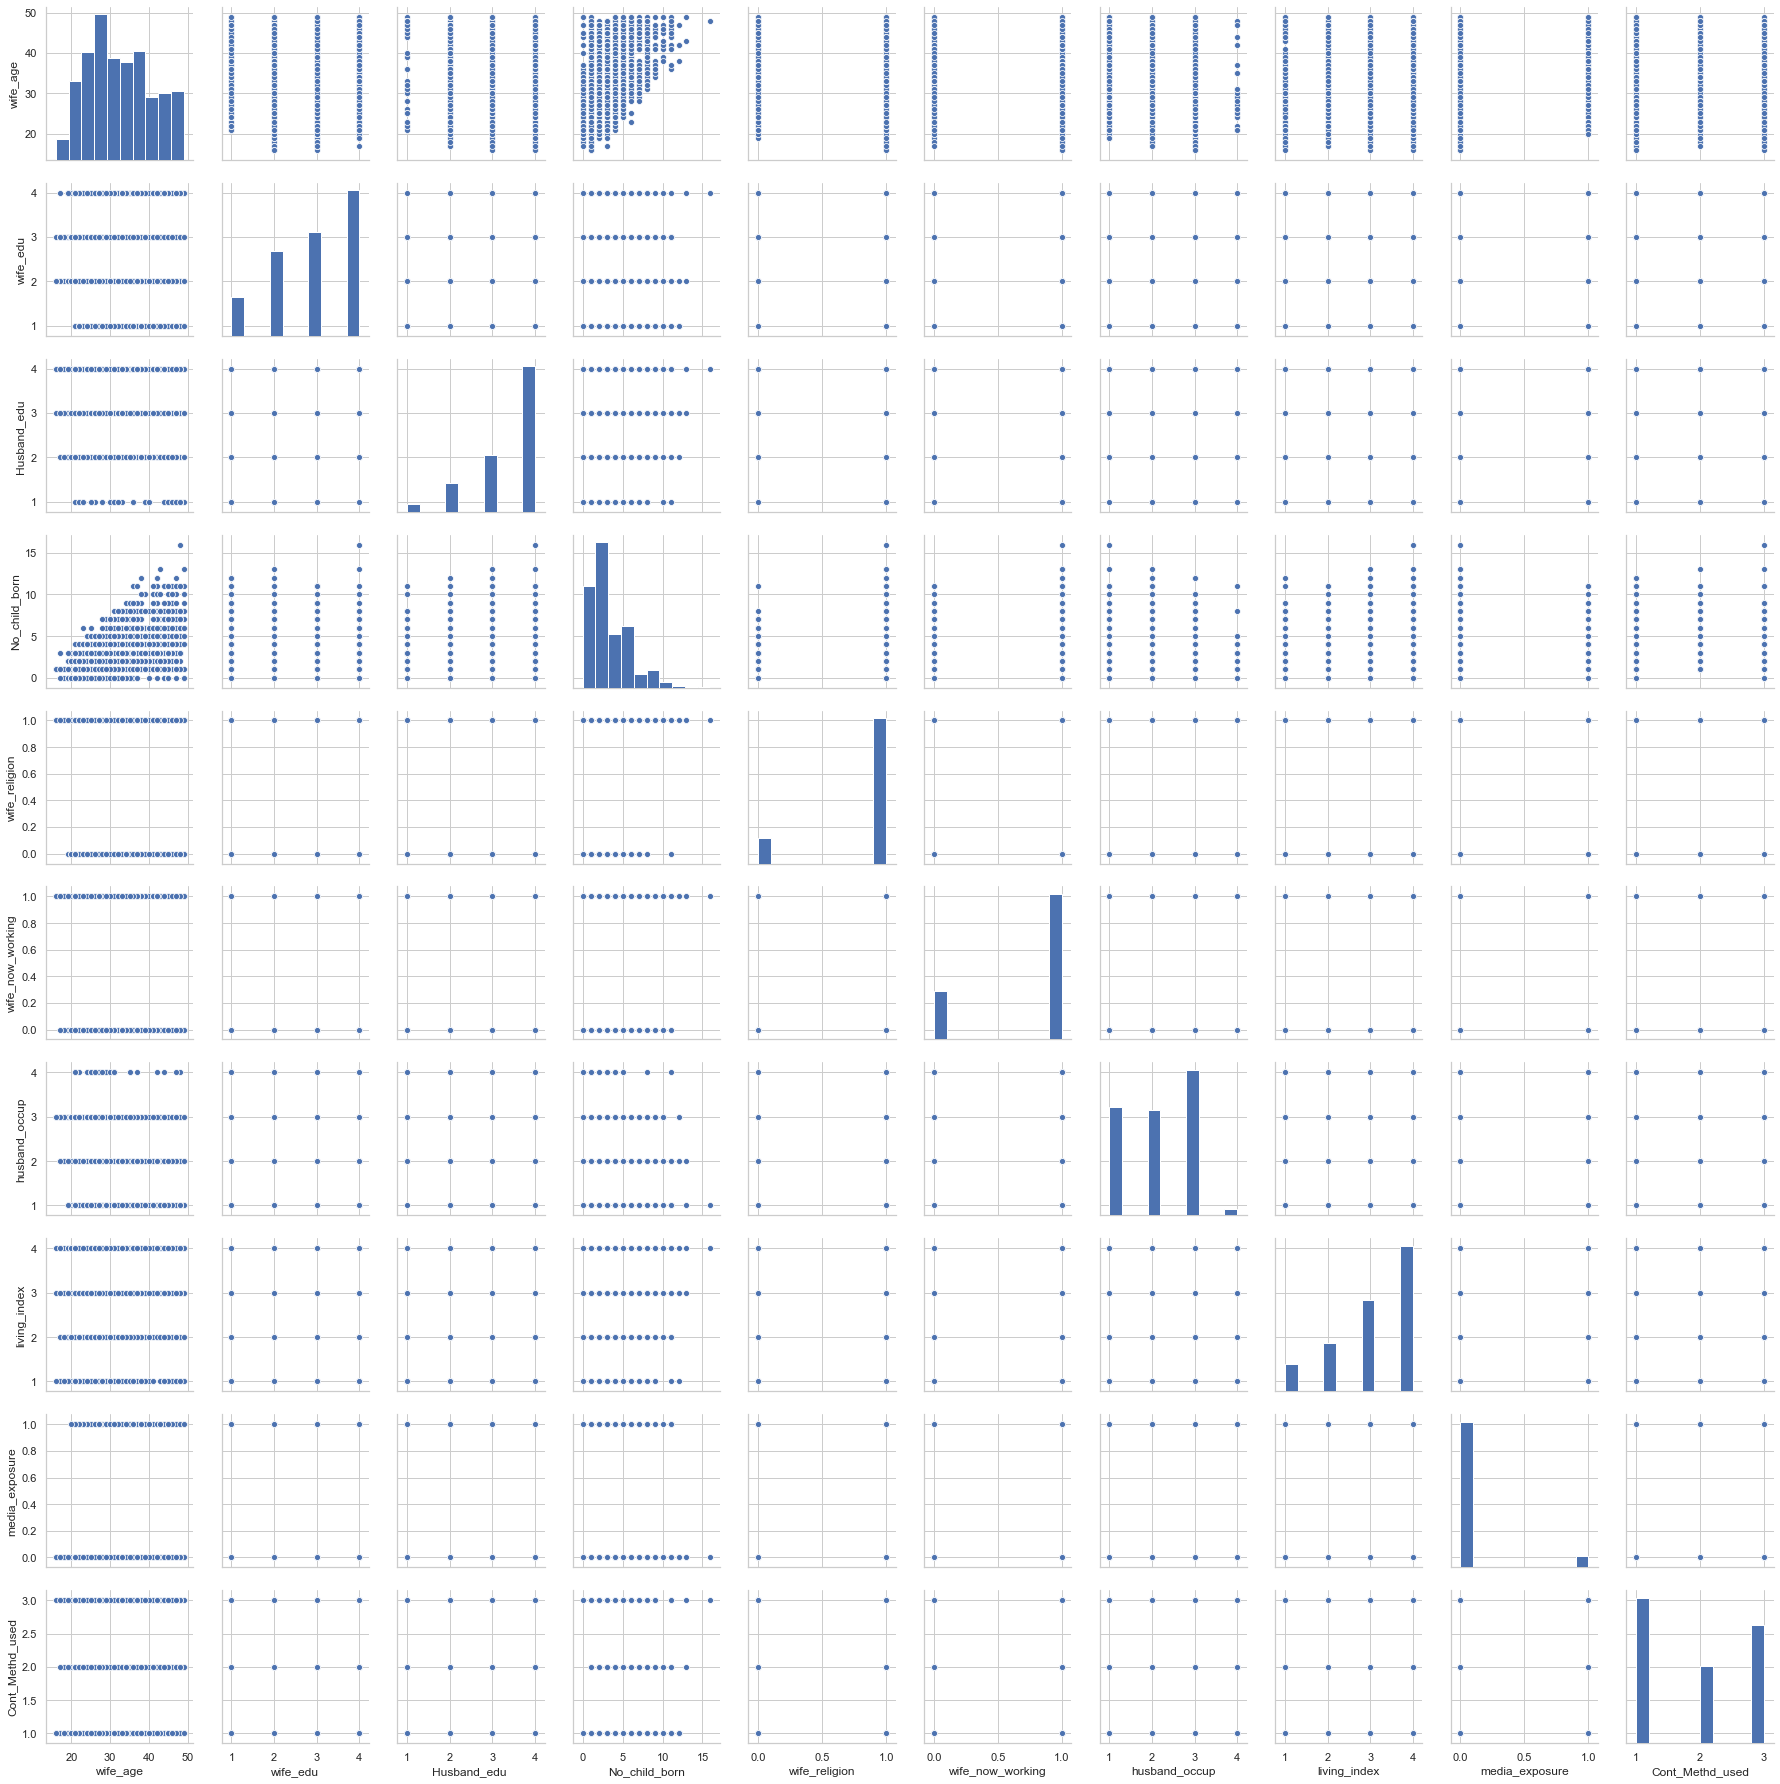

In [38]:
sns.pairplot(df)

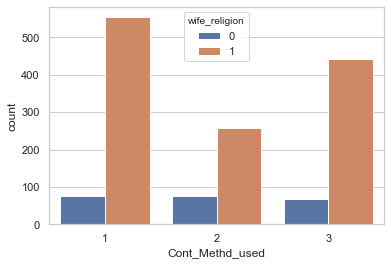

In [39]:
sns.countplot(x='Cont_Methd_used',data=df,hue="wife_religion")
#Wife religion 0: Non-Islamic
#Wife religion 1: Islamic

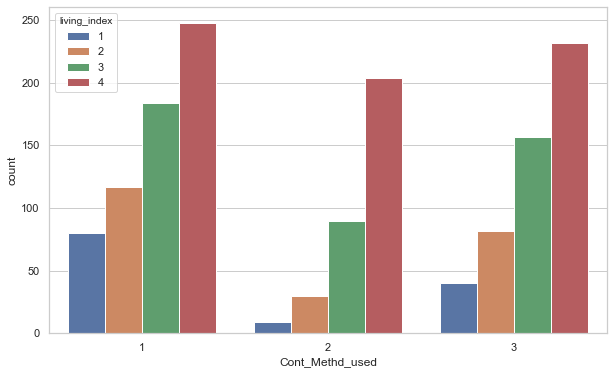

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cont_Methd_used',data=df,hue="living_index")
#Living Index 1:4- low to high gross income.

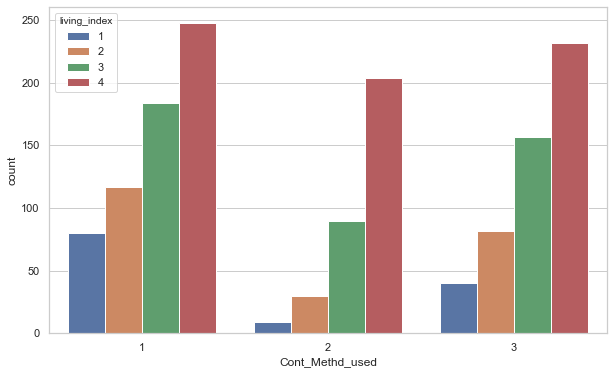

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cont_Methd_used',data=df,hue="living_index")
#Living Index 1:4- low to high gross income.

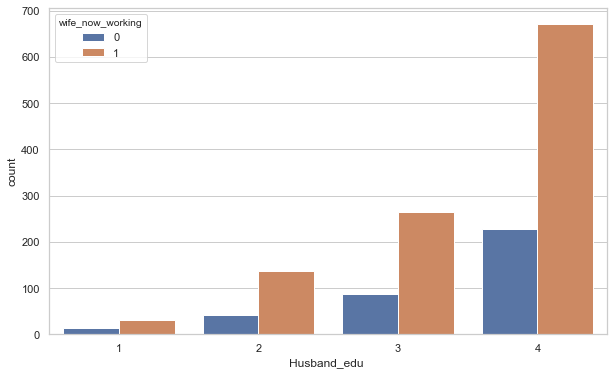

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='Husband_edu ',data =df,hue="wife_now_working")
#Wife_now_working: 0 - not working
#Wife_now_working: 1 - Working

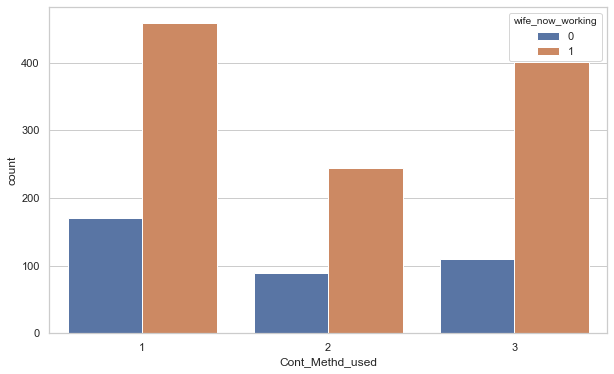

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cont_Methd_used',data=df,hue="wife_now_working")

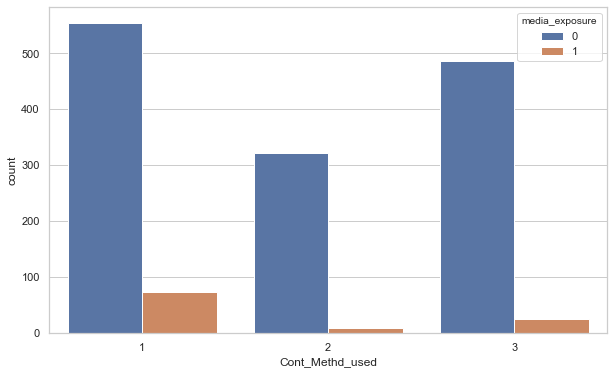

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cont_Methd_used',data=df,hue="media_exposure")

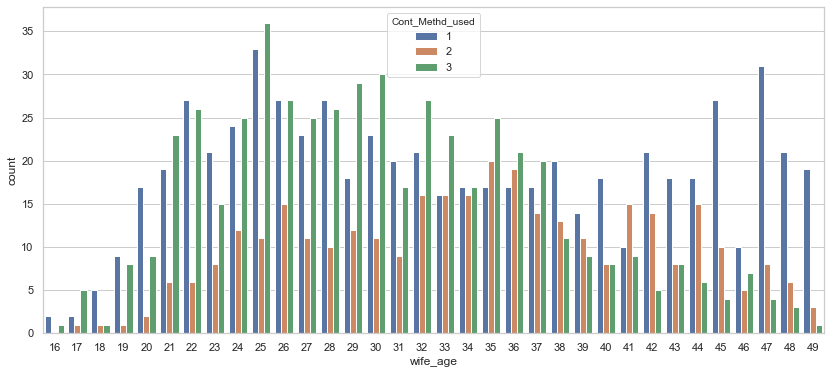

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(x='wife_age',data=df,hue="Cont_Methd_used")

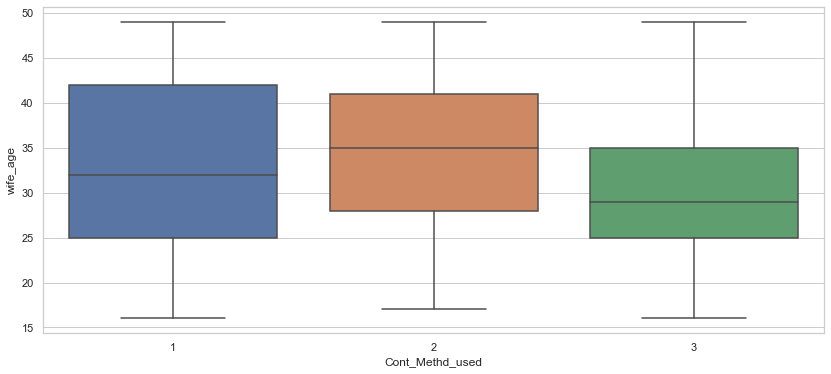

In [46]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Cont_Methd_used',y='wife_age',data=df)

In [47]:
import numpy as np
covariance = np.cov(df['Cont_Methd_used'], df['husband_occup'])
covariance #gives the covariance matrix

array([[0.76803477, 0.01376498],
       [0.01376498, 0.7479781 ]])

In [48]:
corrcoef = np.corrcoef(df['Cont_Methd_used'], df['husband_occup'])
corrcoef #correlation co-efficient matrix

array([[1.        , 0.01816104],
       [0.01816104, 1.        ]])

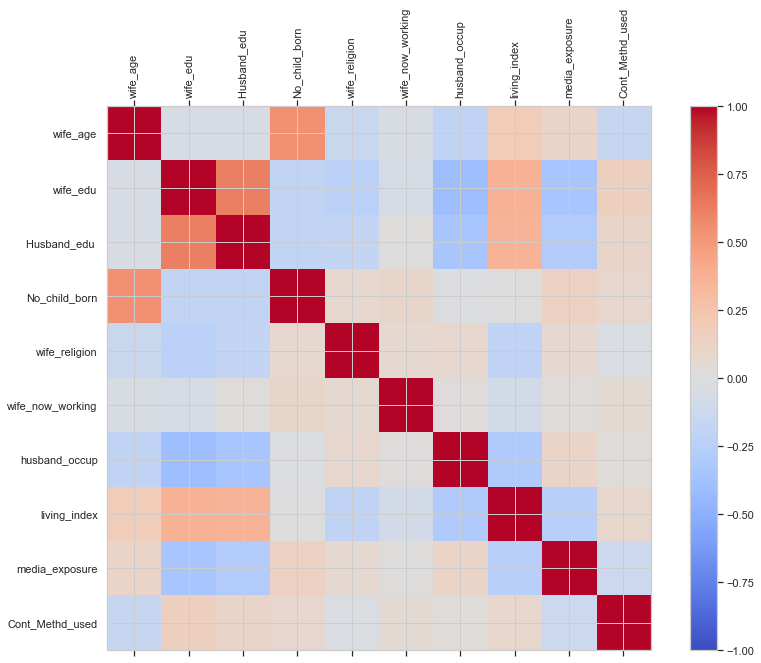

In [49]:
corr = df.corr()
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a296bd630>,
      dtype=object)

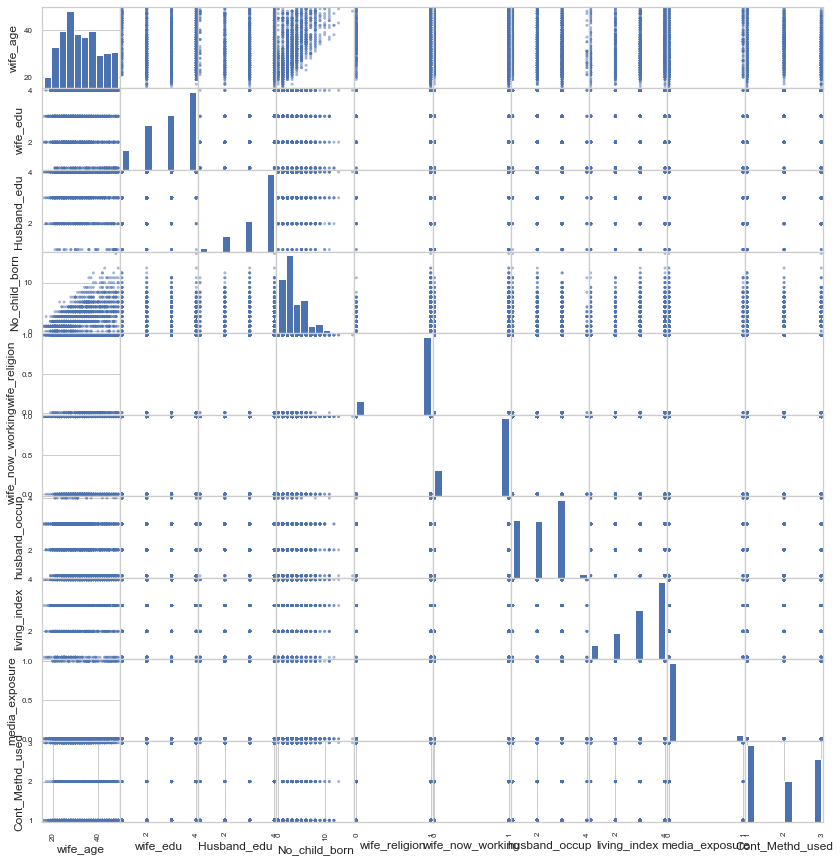

In [52]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,  figsize=(14, 10))

#pd.scatter_matrix(df, figsize=(14, 15))
#plt.show()

# Correlation and Linear relationship between variables

In [91]:
from scipy.stats import pearsonr
# calculate Pearson's correlation

corr, _ = pearsonr(df['wife_edu'], df['No_child_born'])

In [92]:
corr #corr is -ve that means educated wives do have less number of children. 

-0.19383860862141786

In [93]:
from scipy.stats import spearmanr
corr_n = spearmanr(df['living_index'], df['No_child_born'])

In [94]:
corr_n

SpearmanrResult(correlation=0.016201334083522048, pvalue=0.5343924149803105)

In [95]:
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau

#Kendall’s tau is a measure of the correspondence between two rankings. 
#Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. 
#Kendall Tau correlation coefficient:
#It quantifies the discrepancy between the number of concordant and discordant pairs of two variables.

## Type of contraception methods used by working women and methods used by women who are not working

corr_n = kendalltau(df['wife_now_working'], df['Cont_Methd_used'])

In [96]:
corr_n

KendalltauResult(correlation=0.0508193346319077, pvalue=0.03945437023268189)

In [97]:
corr_n = kendalltau(df['living_index'], df['No_child_born'])

In [98]:
corr_n

KendalltauResult(correlation=0.013499562331294089, pvalue=0.5231230332993493)

In [99]:
corr_n = kendalltau(df['wife_age'], df['Cont_Methd_used'])
corr_n
## There is a weak negative correlation between Wife's age and Contraception Method used.
#The p-value is very less/small, hence we can say that the model is significant, 
#we can confidently reject the null hypothesis that the samples are uncorrelated.

KendalltauResult(correlation=-0.11609426387590079, pvalue=1.4747916632469445e-08)

In [100]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
x = np.array(df['wife_age']).reshape((-1,1))
y = np.array(df['No_child_born'])

In [101]:
linear_model = LinearRegression()
linear_model = LinearRegression().fit(x, y)

In [102]:
r_sq = linear_model.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2917359771768294


In [103]:
print('intercept:', linear_model.intercept_)

print('slope:', linear_model.coef_)

#The value 𝑏₀ = -1.77 (approximately) illustrates that your model predicts the response -1.77 when 𝑥 is zero. 
#The value 𝑏₁ = 0.155 means that the predicted response rises by 0.155 when 𝑥 is increased by one.


intercept: -1.7768944621618599
slope: [0.15484082]


In [104]:
from sklearn.linear_model import LinearRegression
linear_model1 = LinearRegression()

y1 = np.array(df['Cont_Methd_used'])
x1 = np.array(df['wife_age']).reshape((-1,1))
linear_model1 = LinearRegression().fit(x1, y1)

In [105]:
r_sq1 = linear_model1.score(x1,y1)
print('coefficient of determination:', r_sq1)

coefficient of determination: 0.026553554765627596


In [106]:
print('intercept:', linear_model1.intercept_)

print('slope:', linear_model1.coef_)

#The value 𝑏₀ = 2.48 (approximately) illustrates that your model predicts the response 2.48 when 𝑥 is zero. 
#The value 𝑏₁ = -0.017 means that the predicted response rises by -0.017 when 𝑥 is increased by one.

intercept: 2.4846891556134865
slope: [-0.01735791]


In [107]:
##Separating the Independent and Dependent Variables
x=df.drop('Cont_Methd_used', axis=1).values
x = df.drop('media_exposure', axis = 1).values
y=df[['Cont_Methd_used']].values

In [108]:
x

array([[24,  2,  3, ...,  2,  3,  1],
       [45,  1,  3, ...,  3,  4,  1],
       [43,  2,  3, ...,  3,  4,  1],
       ...,
       [39,  3,  3, ...,  1,  4,  3],
       [33,  3,  3, ...,  2,  2,  3],
       [17,  3,  3, ...,  2,  4,  3]])

In [109]:
#feature scaling (or standardization) for independent variables
sc = StandardScaler()
x = sc.fit_transform(x)

In [111]:
from sklearn.model_selection import train_test_split
# Split into training and test set
# 80% of the input for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.15,random_state=20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1252, 9) (1252, 1)
(221, 9) (221, 1)


# KNN Model

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# KNN model without hyperparameter tuning
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Model Accuracy: {}%'.format(knn.score(x_test,y_test) * 100))

Model Accuracy: 94.57013574660633%


In [116]:
# KNN with grid search (for hyperparameter tuning)
prmts = {
            'n_neighbors':[1,2,3,4,5],
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'metric': ['minkowski', 'euclidean']      
        }

knngs = GridSearchCV(knn,prmts,cv=5)
knngs.fit(x,y)
print('Best Score: {}%'.format(knngs.best_score_ * 100))
print('Best Parameters: {}'.format(knngs.best_params_))

Best Score: 94.90835030549898%
Best Parameters: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5}


In [118]:
#kNN with best parameters after hyperparameter tuning
knnbst=KNeighborsClassifier(algorithm='kd_tree',metric='minkowski',n_neighbors= 4)
knnbst.fit(x_train,y_train)
y_pred = knnbst.predict(x_test)
#pcm=cm(y_test,y_pred)
#print('Performace of the model using confusion matrix :')
#print(pcm)
knn_bst_score=knnbst.score(x_test,y_test)
print('Model Accuracy: {}%'.format(knn_bst_score * 100))

Model Accuracy: 95.47511312217195%


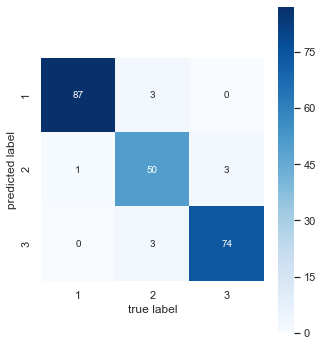

In [122]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 6))

sns.heatmap(mat.T, xticklabels=np.unique(y_test),
            annot=True,fmt="d",square=True, yticklabels=np.unique(y_test), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

# Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

# LR model without hyperparameter tuning
lr=LogisticRegression(multi_class='multinomial',solver='saga',random_state=30)
lr.fit(x_train,y_train)
lr_b_hpt=lr.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_b_hpt * 100))


Model Accuracy: 100.0%


In [126]:
#LR with best parameters after hyperparameter tuning
lrbst=LogisticRegression(C=0.1, solver='newton-cg')
lrbst.fit(x_train,y_train)
y_pred = lrbst.predict(x_test)
#pcm=cm(y_test,y_pred)
#print('Performace of the model using confusion matrix :')
#print(pcm)
lr_bst_score=lrbst.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_bst_score * 100))

Model Accuracy: 95.92760180995475%


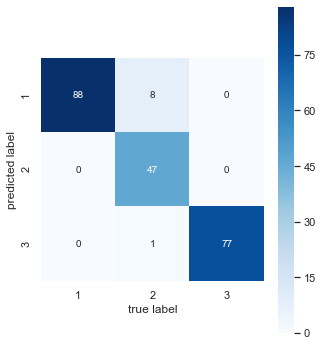

In [127]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 6))

sns.heatmap(mat.T, xticklabels=np.unique(y_test),
            annot=True,fmt="d",square=True, yticklabels=np.unique(y_test), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

### Conclusion: 

Among all the models we can compare and see that logistic regression without hyperparameter tuning has highest score i.e.98.19%.We deliver this model as a representation of how the needs of a country (here Indonesia) can be analysed and predicted using the statistical methods. In the same way, these methods can be applied to the datasets belonging to various countries and countrywise need can also be analyzed and projected.This will help the institutions like WHO /UN to ensure more people benefit from contraception thereby reducing maternal deaths and improving the health of both mother and the child.